# Capstone Project - 
# A Model that recognizes street signs in Germany

### In this project, we will create a site that can recognize street signs in Germany. To do this, we will first take previously taken street sign images, read them and train our model with Tensorflow and Keras.

<img src=https://sonhabereu.teimg.com/sonhaber-eu/uploads/2023/12/belcika-trafik-levhalari.jpg width='400'>

In [1]:
#pip install opencv-python

In [2]:
import cv2
import pandas as pd
import os

In [3]:
labels = [str(i) for i in range(43)]
img_path = 'Train/'

In [4]:
labels

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42']

In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [6]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [7]:
df.sample(10)

,img,label
34242,Train/35/00035_00029_00026.png,35
27695,Train/23/00023_00014_00015.png,23
24340,Train/17/00017_00026_00017.png,17
9285,Train/5/00005_00013_00000.png,5
5187,Train/3/00003_00005_00013.png,3
19913,Train/12/00012_00048_00011.png,12
2617,Train/2/00002_00050_00022.png,2
37952,Train/38/00038_00068_00003.png,38
3969,Train/2/00002_00073_00018.png,2
11943,Train/8/00008_00027_00012.png,8


In [8]:
df.shape

(39209, 2)

In [9]:
df.head()

,img,label
0,Train/0/00000_00005_00023.png,0
1,Train/0/00000_00006_00017.png,0
2,Train/0/00000_00006_00003.png,0
3,Train/0/00000_00003_00018.png,0
4,Train/0/00000_00003_00024.png,0


In [10]:
label_names = {
            0: 'Speed limit (20km/h)',
            1: 'Speed limit (30km/h)', 
            2: 'Speed limit (50km/h)', 
            3: 'Speed limit (60km/h)', 
            4: 'Speed limit (70km/h)', 
            5: 'Speed limit (80km/h)', 
            6: 'End of speed limit (80km/h)', 
            7: 'Speed limit (100km/h)', 
            8: 'Speed limit (120km/h)', 
            9: 'No passing', 
            10: 'No passing veh over 3.5 tons', 
            11: 'Right-of-way at intersection', 
            12: 'Priority road', 
            13: 'Yield', 
            14: 'Stop', 
            15: 'No vehicles', 
            16: 'Veh > 3.5 tons prohibited', 
            17: 'No entry', 
            18: 'General caution', 
            19: 'Dangerous curve left', 
            20: 'Dangerous curve right', 
            21: 'Double curve', 
            22: 'Bumpy road', 
            23: 'Slippery road', 
            24: 'Road narrows on the right', 
            25: 'Road work', 
            26: 'Traffic signals', 
            27: 'Pedestrians', 
            28: 'Children crossing', 
            29: 'Bicycles crossing', 
            30: 'Beware of ice/snow',
            31: 'Wild animals crossing', 
            32: 'End speed + passing limits', 
            33: 'Turn right ahead', 
            34: 'Turn left ahead', 
            35: 'Ahead only', 
            36: 'Go straight or right', 
            37: 'Go straight or left', 
            38: 'Keep right', 
            39: 'Keep left', 
            40: 'Roundabout mandatory', 
            41: 'End of no passing', 
            42: 'End no passing veh > 3.5 tons'
}

In [11]:
df['label'] = df['label'].astype(int)

In [12]:
df['label_name'] = df['label'].map(label_names)

In [13]:
df.head()

,img,label,label_name
0,Train/0/00000_00005_00023.png,0,Speed limit (20km/h)
1,Train/0/00000_00006_00017.png,0,Speed limit (20km/h)
2,Train/0/00000_00006_00003.png,0,Speed limit (20km/h)
3,Train/0/00000_00003_00018.png,0,Speed limit (20km/h)
4,Train/0/00000_00003_00024.png,0,Speed limit (20km/h)


In [14]:
import matplotlib.pyplot as plt

In [15]:
image=cv2.imread(str(df['img'][500])) 

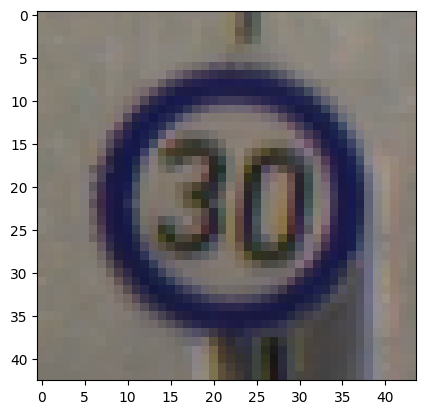

In [16]:
plt.imshow(image);


### Here we normalize and shrink the images

In [17]:
import matplotlib.pyplot as plt

In [18]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))
    img=img/255.0    
    x.append(img)

In [19]:
import numpy as np

In [20]:
x=np.array(x)

In [21]:
x

array([[[[0.65098039, 0.65882353, 0.7372549 ],
         [0.40392157, 0.49019608, 0.66666667],
         [0.34117647, 0.46666667, 0.67843137],
         ...,
         [0.34509804, 0.47843137, 0.70196078],
         [0.36862745, 0.51372549, 0.70980392],
         [0.36862745, 0.49803922, 0.71372549]],

        [[0.5372549 , 0.59607843, 0.67058824],
         [0.34901961, 0.45098039, 0.63529412],
         [0.34117647, 0.4627451 , 0.65490196],
         ...,
         [0.3372549 , 0.46666667, 0.65490196],
         [0.35294118, 0.47843137, 0.64705882],
         [0.35294118, 0.47058824, 0.65098039]],

        [[0.58431373, 0.60784314, 0.70588235],
         [0.5254902 , 0.57647059, 0.69019608],
         [0.52156863, 0.56078431, 0.70980392],
         ...,
         [0.61960784, 0.65098039, 0.70196078],
         [0.61960784, 0.65490196, 0.70588235],
         [0.62745098, 0.6627451 , 0.70980392]],

        ...,

        [[0.4       , 0.37647059, 0.36078431],
         [0.36470588, 0.36078431, 0.35686275]

In [22]:
y=df['label']

In [23]:
y.value_counts()

label
2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
34     420
6      420
36     390
22     390
40     360
20     360
21     330
39     300
29     270
24     270
41     240
42     240
32     240
27     240
37     210
19     210
0      210
Name: count, dtype: int64

### We train our model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [26]:
#pip install tensorflow

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

### CNN Convuliton Neural Networks

In [28]:
model=Sequential()
model.add(Input(shape=(30,30,3)))

model.add(Conv2D(43,kernel_size=(3,3),activation='relu'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(.25))
model.add(Dense(64))
model.add(Dense(43, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20,verbose=1)

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.7367 - loss: 1.0781 - val_accuracy: 0.9318 - val_loss: 0.2475
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9673 - loss: 0.1160 - val_accuracy: 0.9663 - val_loss: 0.1311
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9776 - loss: 0.0748 - val_accuracy: 0.9235 - val_loss: 0.3934
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9761 - loss: 0.0805 - val_accuracy: 0.9723 - val_loss: 0.1288
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9867 - loss: 0.0494 - val_accuracy: 0.9820 - val_loss: 0.0861
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9833 - loss: 0.0560 - val_accuracy: 0.9663 - val_loss: 0.1878
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9866 - loss: 0.0512 - val_accuracy: 0.9793 - val_loss: 0.1232
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9890 - loss: 0.0409 - 

In [30]:
loss,accuracy=model.evaluate(x_test,y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9885 - loss: 0.0859


In [31]:
accuracy

0.9900535345077515

In [32]:
tahmin=model.predict(x_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [33]:
model.save('trafik.h5')

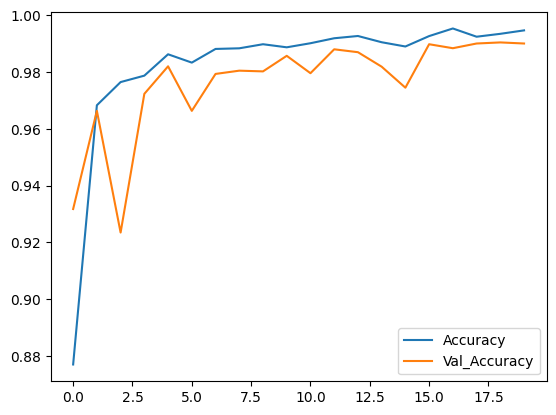

In [34]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [35]:
loss_f=pd.DataFrame(history.history)

<Axes: >

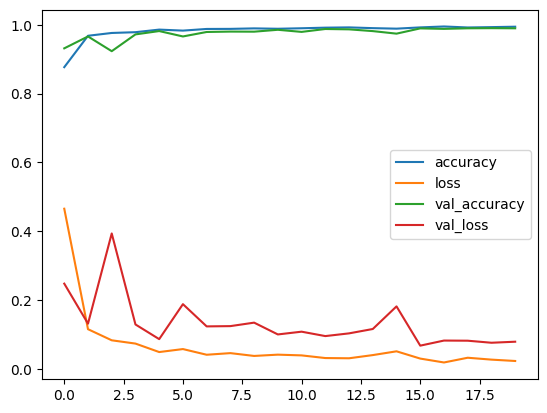

In [36]:
loss_f.plot()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [38]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[ 37,   1,   0, ...,   0,   0,   0],
       [  0, 489,   1, ...,   0,   0,   0],
       [  0,   8, 441, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  60,   0,   0],
       [  0,   0,   0, ...,   0,  47,   0],
       [  0,   0,   0, ...,   0,   0,  40]])

In [39]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [40]:
import seaborn as sns

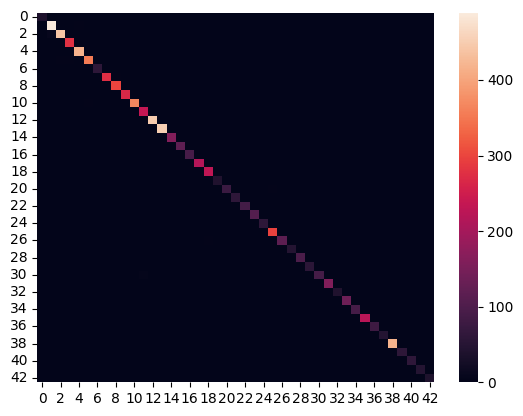

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

### Here we have drawn a result with accuracy: 0.9885 - loss: 0.0859 in our model.